# Sleep Efficiency Analysis

The raw dataset consists of sleep-related data for individuals, including information such as age, gender, bedtime, wakeup time, sleep duration, sleep efficiency, and various sleep stage percentages, as well as lifestyle factors like caffeine and alcohol consumption, smoking status, and exercise frequency.

Dataset Source: https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency

# Data Preprocessing

In [84]:
import pandas as pd
df_sleep = pd.read_csv('Sleep_Efficiency.csv')
df_sleep

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


# Bedtime and Wakeup Time Split
The raw dataset consists of sleep-related data for individuals, including information such as age, gender, bedtime, wakeup time, sleep duration, sleep efficiency, and various sleep stage percentages, as well as lifestyle factors like caffeine and alcohol consumption, smoking status, and exercise frequency.

In [85]:
df_sleep[['Bedtime_date', 'Bedtime_time']] = df_sleep['Bedtime'].str.split(' ', expand=True)
df_sleep['Bedtime_time'] = df_sleep['Bedtime_time'].str[:-3]
df_sleep[['Wakeup_date','Wakeup_time' ]] = df_sleep['Wakeup time'].str.split(' ', expand=True)
df_sleep['Wakeup_time'] = df_sleep['Wakeup_time'].str[:-3]
df_sleep['Smoking status'] = df_sleep['Smoking status'].map({'No': 0, 'Yes': 1})
df_sleep['Sleep efficiency'] = (df_sleep['Sleep efficiency']*100).astype(int)
int_columns = ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
df_sleep[int_columns] = df_sleep[int_columns].fillna(0).astype(int)
df_sleep

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_date,Bedtime_time,Wakeup_date,Wakeup_time
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,88,18,70,12,0,0,0,1,3,2021-03-06,01:00,2021-03-06,07:00
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,66,19,28,53,3,0,3,1,3,2021-12-05,02:00,2021-12-05,09:00
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,89,20,70,10,1,0,0,0,3,2021-05-25,21:30,2021-05-25,05:30
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,51,23,25,52,3,50,5,1,1,2021-11-03,02:30,2021-11-03,08:30
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,76,27,55,18,3,0,3,0,3,2021-03-13,01:00,2021-03-13,09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,91,22,57,21,0,0,0,0,5,2021-11-13,22:00,2021-11-13,05:30
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,74,28,57,15,4,25,0,0,3,2021-03-31,21:00,2021-03-31,03:00
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,55,20,32,48,1,0,3,1,0,2021-09-07,23:00,2021-09-07,07:30
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,76,18,72,10,3,0,0,0,3,2021-07-29,21:00,2021-07-29,04:00


In [86]:
column_order = ['ID', 'Age', 'Gender', 'Bedtime', 'Bedtime_date', 'Bedtime_time',
                'Wakeup time', 'Wakeup_date', 'Wakeup_time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
                'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
                'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']
df_sleep = df_sleep[column_order]
df_sleep = df_sleep.drop(['Bedtime', 'Wakeup time'], axis=1)
df_sleep = df_sleep.rename(columns={'Bedtime_time': 'Bedtime'})
df_sleep

,ID,Age,Gender,Bedtime_date,Bedtime,Wakeup_date,Wakeup_time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06,01:00,2021-03-06,07:00,6.0,88,18,70,12,0,0,0,1,3
1,2,69,Male,2021-12-05,02:00,2021-12-05,09:00,7.0,66,19,28,53,3,0,3,1,3
2,3,40,Female,2021-05-25,21:30,2021-05-25,05:30,8.0,89,20,70,10,1,0,0,0,3
3,4,40,Female,2021-11-03,02:30,2021-11-03,08:30,6.0,51,23,25,52,3,50,5,1,1
4,5,57,Male,2021-03-13,01:00,2021-03-13,09:00,8.0,76,27,55,18,3,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13,22:00,2021-11-13,05:30,7.5,91,22,57,21,0,0,0,0,5
448,449,52,Male,2021-03-31,21:00,2021-03-31,03:00,6.0,74,28,57,15,4,25,0,0,3
449,450,40,Female,2021-09-07,23:00,2021-09-07,07:30,8.5,55,20,32,48,1,0,3,1,0
450,451,45,Male,2021-07-29,21:00,2021-07-29,04:00,7.0,76,18,72,10,3,0,0,0,3


# Dateset Information

In [87]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime_date            452 non-null    object 
 4   Bedtime                 452 non-null    object 
 5   Wakeup_date             452 non-null    object 
 6   Wakeup_time             452 non-null    object 
 7   Sleep duration          452 non-null    float64
 8   Sleep efficiency        452 non-null    int64  
 9   REM sleep percentage    452 non-null    int64  
 10  Deep sleep percentage   452 non-null    int64  
 11  Light sleep percentage  452 non-null    int64  
 12  Awakenings              452 non-null    int64  
 13  Caffeine consumption    452 non-null    int64  
 14  Alcohol consumption     452 non-null    in

In [88]:
df_sleep.to_csv('Cleaned_Sleep_Efficiency.csv', index=False)

# Exploratory Data Analysis (EDA)

# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and Reading Dataset

In [2]:
df = pd.read_csv("Cleaned_Sleep_Efficiency.csv")

# Display basic information about the dataset

In [3]:
print("Number of rows and columns:", df.shape)
print("\nColumn names:", df.columns)

Number of rows and columns: (452, 17)

Column names: Index(['ID', 'Age', 'Gender', 'Bedtime_date', 'Bedtime', 'Wakeup_date',
       'Wakeup_time', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


# Check for missing values

Checks for missing values in the DataFrame 'df' and prints the count of null values for each column. It provides a concise summary of the data quality, allowing quick identification of any missing information in the dataset

In [6]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
ID                        0
Age                       0
Gender                    0
Bedtime_date              0
Bedtime                   0
Wakeup_date               0
Wakeup_time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


# Check for duplicate rows

Examines the DataFrame 'df' to identify and count duplicate rows, aiding in the detection of any replicated observations. This succinct summary assists in ensuring data integrity by revealing instances of duplicated information within the dataset,



In [7]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


# Descriptive statistics for non-numeric columns

Computes descriptive statistics for non-numeric columns in the DataFrame 'df' and prints details such as count, unique values, top frequency, and top value for each non-numeric attribute. This concise summary offers insights into the distribution and characteristics of categorical data within the dataset.



In [9]:
print("\nDescriptive statistics for non-numeric columns:")
print(df.describe(include='object'))


Descriptive statistics for non-numeric columns:
       Gender Bedtime_date Bedtime Wakeup_date Wakeup_time
count     452          452     452         452         452
unique      2          265      11         265          19
top      Male   2021-11-06   00:00  2021-11-06       09:00
freq      228            7      75           7          49


# Explore unique values in categorical columns

In [10]:
for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {column}:", df[column].unique())


Unique values in Gender: ['Female' 'Male']

Unique values in Bedtime_date: ['2021-03-06' '2021-12-05' '2021-05-25' '2021-11-03' '2021-03-13'
 '2021-07-01' '2021-07-21' '2021-08-16' '2021-04-05' '2021-09-16'
 '2021-02-28' '2021-03-10' '2021-08-07' '2021-02-25' '2021-07-03'
 '2021-12-06' '2021-03-24' '2021-08-27' '2021-07-27' '2021-12-03'
 '2021-05-02' '2021-06-14' '2021-12-23' '2021-05-21' '2021-03-26'
 '2021-06-18' '2021-12-15' '2021-11-08' '2021-12-25' '2021-08-10'
 '2021-05-24' '2021-11-28' '2021-07-28' '2021-10-19' '2021-08-06'
 '2021-09-05' '2021-06-19' '2021-07-29' '2021-05-08' '2021-06-27'
 '2021-08-13' '2021-12-10' '2021-04-07' '2021-04-20' '2021-04-11'
 '2021-08-01' '2021-04-10' '2021-11-24' '2021-11-27' '2021-08-31'
 '2021-08-09' '2021-12-04' '2021-09-22' '2021-03-20' '2021-11-07'
 '2021-08-08' '2021-06-11' '2021-09-30' '2021-05-03' '2021-04-24'
 '2021-02-21' '2021-07-16' '2021-12-24' '2021-05-07' '2021-09-23'
 '2021-06-08' '2021-11-26' '2021-12-16' '2021-09-02' '2021-01-11'


# Explore summary statistics for numeric columns

Calculates and displays summary statistics, including count, mean, standard deviation, minimum, and maximum values, for numeric columns in the DataFrame 'df'. This succinct summary provides a comprehensive overview of the central tendencies and dispersion of numerical data within the dataset.

In [11]:
print("\nSummary statistics for numeric columns:")
print(df.describe())


Summary statistics for numeric columns:
               ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708         78.880531   
std    130.625419   13.172250        0.866625         13.541555   
min      1.000000    9.000000        5.000000         50.000000   
25%    113.750000   29.000000        7.000000         69.750000   
50%    226.500000   40.000000        7.500000         82.000000   
75%    339.250000   52.000000        8.000000         90.000000   
max    452.000000   69.000000       10.000000         99.000000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18

# Explore outliers in numeric columns

Identifies and counts outliers in numeric columns of the DataFrame 'df' by applying the Interquartile Range (IQR) method. It provides a concise summary of potential extreme values, aiding in the exploration of data points that deviate significantly from the central tendency.

In [16]:
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
    print(f"\nOutliers in {column}:", outliers.sum())


Outliers in ID: 0

Outliers in Age: 0

Outliers in Sleep duration: 16

Outliers in Sleep efficiency: 0

Outliers in REM sleep percentage: 0

Outliers in Deep sleep percentage: 60

Outliers in Light sleep percentage: 2

Outliers in Awakenings: 0

Outliers in Caffeine consumption: 4

Outliers in Alcohol consumption: 0

Outliers in Smoking status: 0

Outliers in Exercise frequency: 0


# Daily Sleep Duration Trend

The code visualizes the daily trend in mean sleep duration, offering insights into variations and patterns over time. Peaks or troughs may indicate irregularities in sleep, while consistent trends suggest stable routines. Observing outliers and correlating trends with external factors can uncover valuable information for tailoring wellness interventions. Analyzing this daily sleep duration data provides a concise overview of sleep patterns and potential areas for improvement within FitWell Corp's wellness programs.

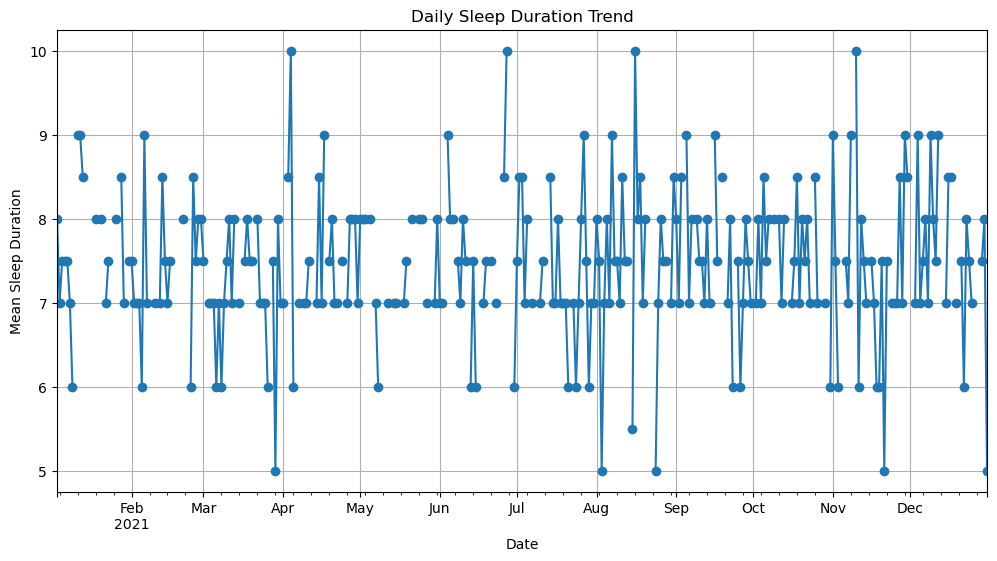

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#file_path = 'path/to/your/dataset/sleep_data.csv'
df = pd.read_csv("Cleaned_Sleep_Efficiency.csv")
# Convert date columns to datetime
df['Wakeup_date'] = pd.to_datetime(df['Wakeup_date'])

# Check for and handle duplicates
df = df[~df.duplicated(subset=['Wakeup_date'], keep='first')]

# Set the index to 'Wakeup_date'
df.set_index('Wakeup_date', inplace=True)

# Resample data daily and calculate mean sleep duration
daily_sleep_duration = df['Sleep duration'].resample('D').mean()

# Plot the daily sleep duration trend
plt.figure(figsize=(12, 6))
daily_sleep_duration.plot(marker='o')
plt.title('Daily Sleep Duration Trend')
plt.xlabel('Date')
plt.ylabel('Mean Sleep Duration')
plt.grid(True)
plt.show()

# Weekly Sleep Efficiency Trend

The plotted trend offers insights into variations and patterns, showcasing weekly fluctuations in sleep efficiency. Peaks or dips in the plot may indicate changes in sleep quality, while the overall trend provides a snapshot of the users' average sleep efficiency over time. Analyzing this weekly sleep efficiency data aids in identifying trends and potential areas for targeted interventions, contributing to FitWell Corp's goal of enhancing users' overall well-being and satisfaction.

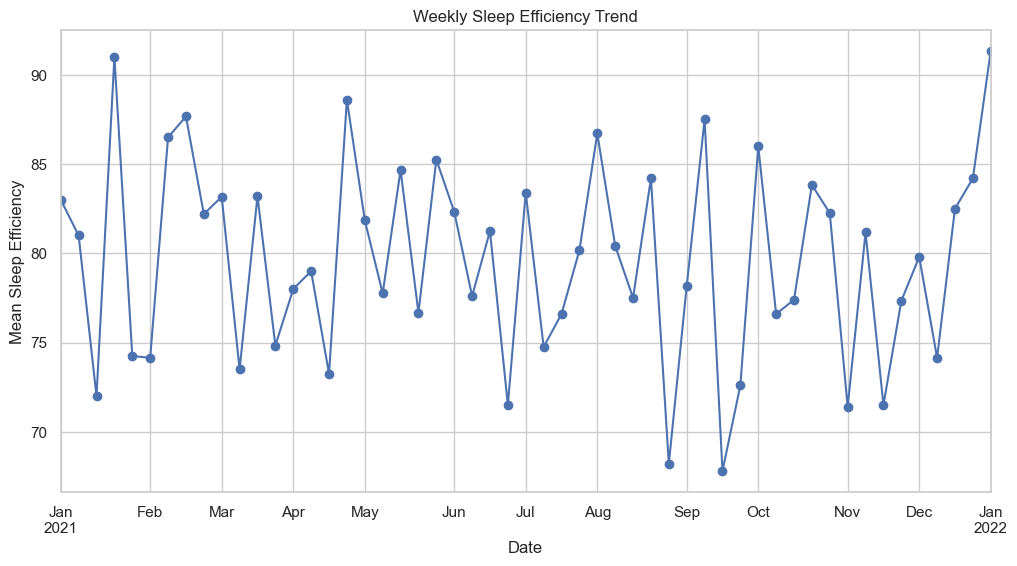

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Cleaned_Sleep_Efficiency.csv")

# Convert date columns to datetime
df['Bedtime_date'] = pd.to_datetime(df['Bedtime_date'])
df['Wakeup_date'] = pd.to_datetime(df['Wakeup_date'])

# Check for and handle duplicates
df = df[~df.duplicated(subset=['Bedtime_date'], keep='first')]

# Set the index to 'Bedtime_date'
df.set_index('Bedtime_date', inplace=True)

# Resample data weekly and calculate mean sleep efficiency
weekly_sleep_efficiency = df['Sleep efficiency'].resample('W').mean()

# Plot the weekly sleep efficiency trend
plt.figure(figsize=(12, 6))
weekly_sleep_efficiency.plot(marker='o')
plt.title('Weekly Sleep Efficiency Trend')
plt.xlabel('Date')
plt.ylabel('Mean Sleep Efficiency')
plt.grid(True)
plt.show()

# Sleep Quality Analysis

The plotted trend offers insights into variations and patterns, showcasing weekly fluctuations in sleep efficiency. Peaks or dips in the plot may indicate changes in sleep quality, while the overall trend provides a snapshot of the users' average sleep efficiency over time. Analyzing this weekly sleep efficiency data aids in identifying trends and potential areas for targeted interventions, contributing to FitWell Corp's goal of enhancing users' overall well-being and satisfaction.

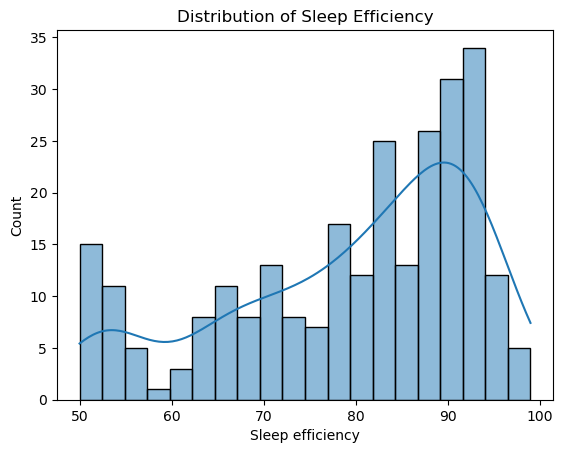

In [22]:
sns.histplot(df['Sleep efficiency'], bins=20, kde=True)
plt.title('Distribution of Sleep Efficiency')
plt.show()

# Sleep Composition Analysis

The box plots visually depict the central tendency, spread, and potential outliers for each sleep component, offering insights into the variability and distribution of sleep composition within the dataset. This analysis aids in understanding the proportion of different sleep stages, guiding potential interventions to optimize specific aspects of sleep quality in FitWell Corp's wellness programs.

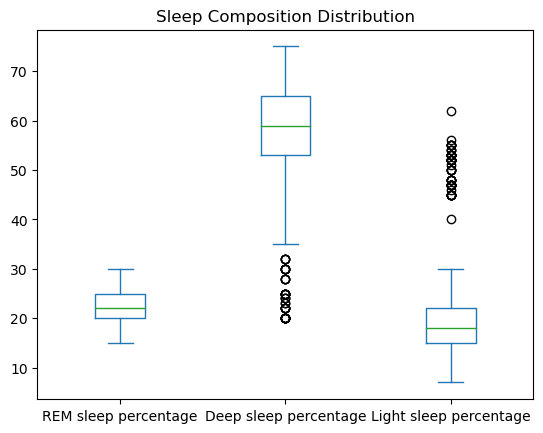

In [23]:
sleep_composition_cols = ['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']
df[sleep_composition_cols].plot(kind='box', title='Sleep Composition Distribution')
plt.show()

# Categorical Variables Analysis

The plot provides a clear overview of the count of individuals with varying smoking statuses, segmented by gender. This categorical variables analysis aids in understanding the distribution of smoking habits within different gender groups, offering valuable insights into potential associations between lifestyle factors and contributing to FitWell Corp's wellness initiatives.



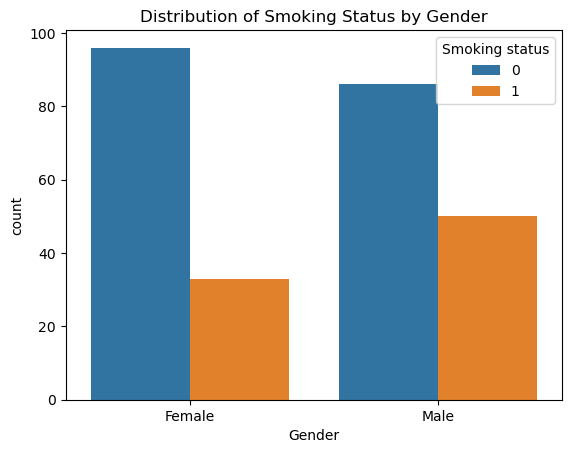

In [24]:
sns.countplot(x='Gender', hue='Smoking status', data=df)
plt.title('Distribution of Smoking Status by Gender')
plt.show()

# Age Distribution Analysis

This visualization provides an overview of the frequency and density of different age groups, offering insights into the age distribution within the dataset. Peaks and trends in the histogram, along with the kernel density estimation, can reveal patterns in the age demographics. Analyzing the age distribution aids in understanding the user demographic composition, guiding potential age-specific interventions or personalized wellness programs within FitWell Corp's initiatives.

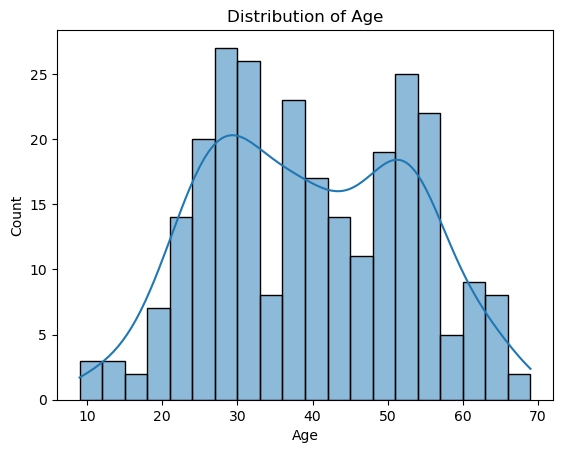

In [25]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# Awakenings Analysis

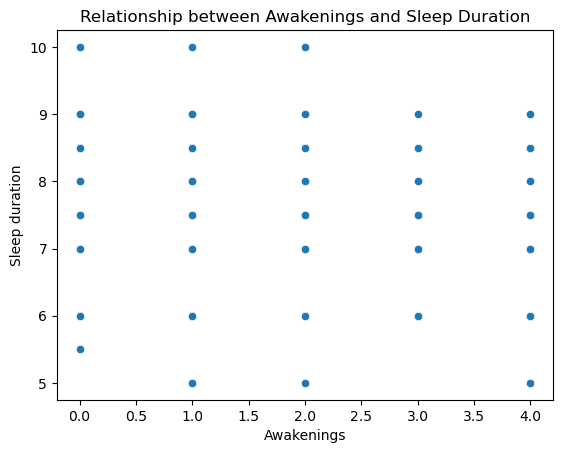

In [26]:
sns.scatterplot(x='Awakenings', y='Sleep duration', data=df)
plt.title('Relationship between Awakenings and Sleep Duration')
plt.show()

# Sleep Duration and Efficiency by Gender

This visualization provides an overview of the frequency and density of different age groups, offering insights into the age distribution within the dataset. Peaks and trends in the histogram, along with the kernel density estimation, can reveal patterns in the age demographics. Analyzing the age distribution aids in understanding the user demographic composition, guiding potential age-specific interventions or personalized wellness programs within FitWell Corp's initiatives.

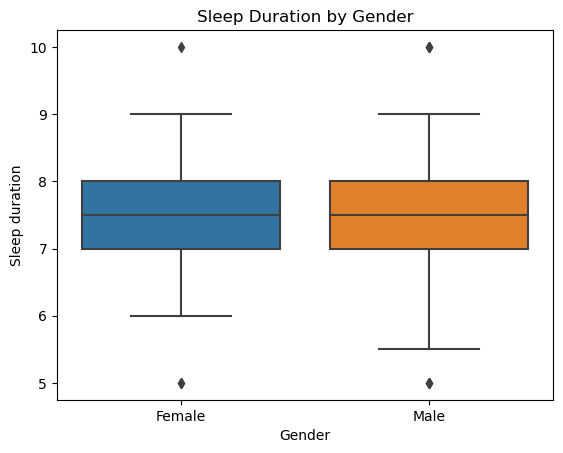

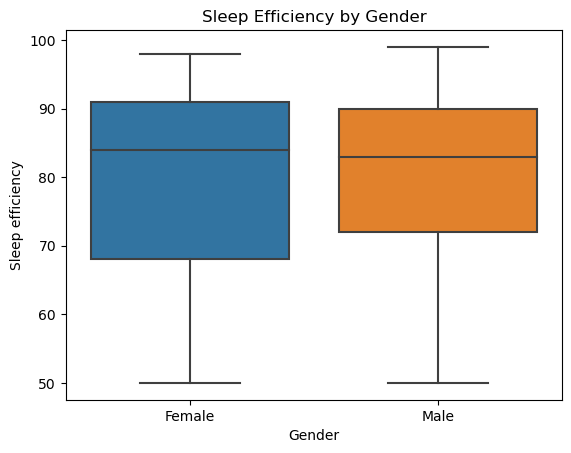

In [27]:
sns.boxplot(x='Gender', y='Sleep duration', data=df)
plt.title('Sleep Duration by Gender')
plt.show()

sns.boxplot(x='Gender', y='Sleep efficiency', data=df)
plt.title('Sleep Efficiency by Gender')
plt.show()

# Exercise Frequency Impact

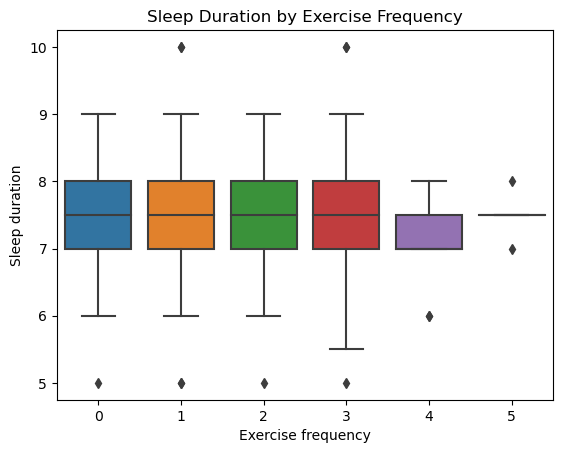

In [28]:
sns.boxplot(x='Exercise frequency', y='Sleep duration', data=df)
plt.title('Sleep Duration by Exercise Frequency')
plt.show()

# Investigate Sleep Duration Patterns

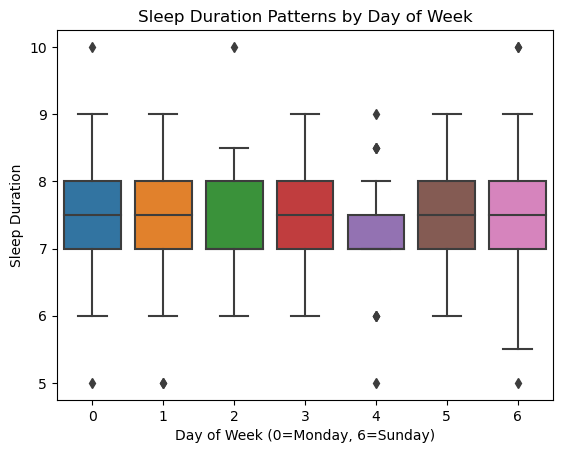

In [29]:
sns.boxplot(x=df.index.dayofweek, y='Sleep duration', data=df)
plt.title('Sleep Duration Patterns by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Sleep Duration')
plt.show()

# Explore Correlation Heatmap

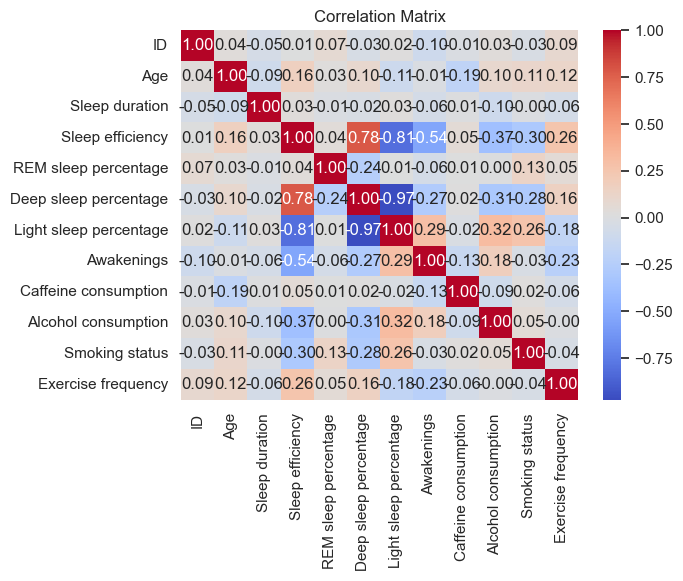

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

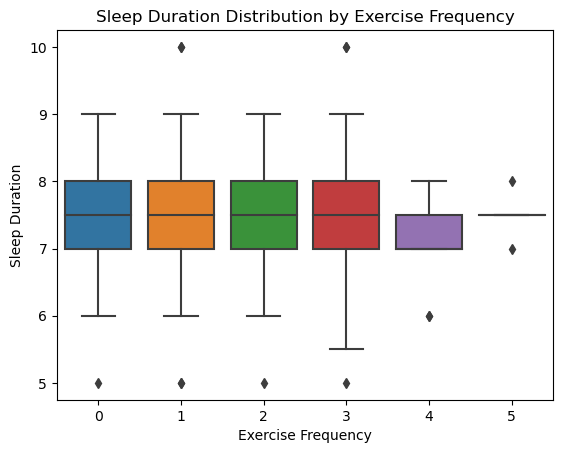

In [31]:
sns.boxplot(x='Exercise frequency', y='Sleep duration', data=df)
plt.title('Sleep Duration Distribution by Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Sleep Duration')
plt.show()

In [32]:
print(df.columns)

Index(['ID', 'Age', 'Gender', 'Bedtime_date', 'Bedtime', 'Wakeup_time',
       'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
       'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption', 'Smoking status',
       'Exercise frequency'],
      dtype='object')


# Data Visualization

In [51]:
df_sleep['Bedtime'] = pd.to_datetime(df_sleep['Bedtime'], format='%H:%M')
df_sleep['Bedtime_reorder'] = ((df_sleep['Bedtime'].dt.hour * 60 + df_sleep['Bedtime'].dt.minute) + 300) % 1440 / 60

df_sleep

,ID,Age,Gender,Bedtime_date,Bedtime,Wakeup_date,Wakeup_time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime_reorder
0,1,65,Female,2021-03-06,1900-01-01 01:00:00,2021-03-06,07:00,6.0,88,18,70,12,0,0,0,1,3,6.0
1,2,69,Male,2021-12-05,1900-01-01 02:00:00,2021-12-05,09:00,7.0,66,19,28,53,3,0,3,1,3,7.0
2,3,40,Female,2021-05-25,1900-01-01 21:30:00,2021-05-25,05:30,8.0,89,20,70,10,1,0,0,0,3,2.5
3,4,40,Female,2021-11-03,1900-01-01 02:30:00,2021-11-03,08:30,6.0,51,23,25,52,3,50,5,1,1,7.5
4,5,57,Male,2021-03-13,1900-01-01 01:00:00,2021-03-13,09:00,8.0,76,27,55,18,3,0,3,0,3,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13,1900-01-01 22:00:00,2021-11-13,05:30,7.5,91,22,57,21,0,0,0,0,5,3.0
448,449,52,Male,2021-03-31,1900-01-01 21:00:00,2021-03-31,03:00,6.0,74,28,57,15,4,25,0,0,3,2.0
449,450,40,Female,2021-09-07,1900-01-01 23:00:00,2021-09-07,07:30,8.5,55,20,32,48,1,0,3,1,0,4.0
450,451,45,Male,2021-07-29,1900-01-01 21:00:00,2021-07-29,04:00,7.0,76,18,72,10,3,0,0,0,3,2.0


**Sleep efficiency by Gender**

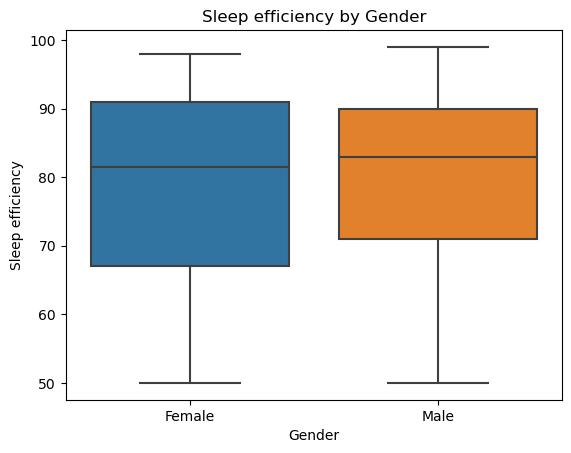

In [45]:
sns.boxplot(x='Gender', y='Sleep efficiency', data=df_sleep)
plt.xlabel('Gender')
plt.ylabel('Sleep efficiency')
plt.title('Sleep efficiency by Gender')
plt.show()

• Insight:

The box plot comparing sleep efficiency by gender reveals that the range of sleep efficiency is greater for females, and a part of females tend to have lower sleep efficiency compared to males. This observation suggests potential gender-related differences in sleep quality, with females showing a more varied distribution of sleep efficiency scores.



**Relationship between Age and Sleep duration by Gender**

/Users/a1000yun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


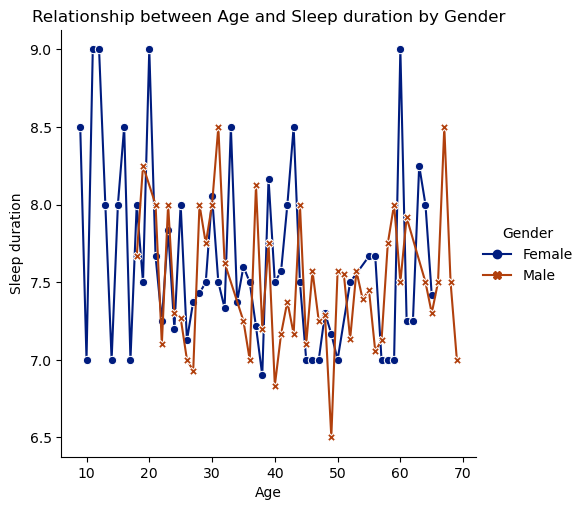

In [47]:
sns.relplot(
    data=df_sleep, kind="line",
    x="Age", y="Sleep duration", hue="Gender",
    style="Gender", markers=True, dashes=False, palette="dark", err_style=None)
plt.xlabel('Age')
plt.ylabel('Sleep duration')
plt.title('Relationship between Age and Sleep duration by Gender')
plt.show()

• Insight:

The line plot depicting the relationship between age and sleep duration. Notably, Females aged between 40 and 50 tend to exhibit higher sleep efficiency compared to males in the same age range. Conversely, males aged between 50 and 65 show higher sleep efficiency than females. Additionally, the plot suggests that individuals under the age around 16 generally have lower sleep efficiency.


**Relationship between Age and Bedtime**

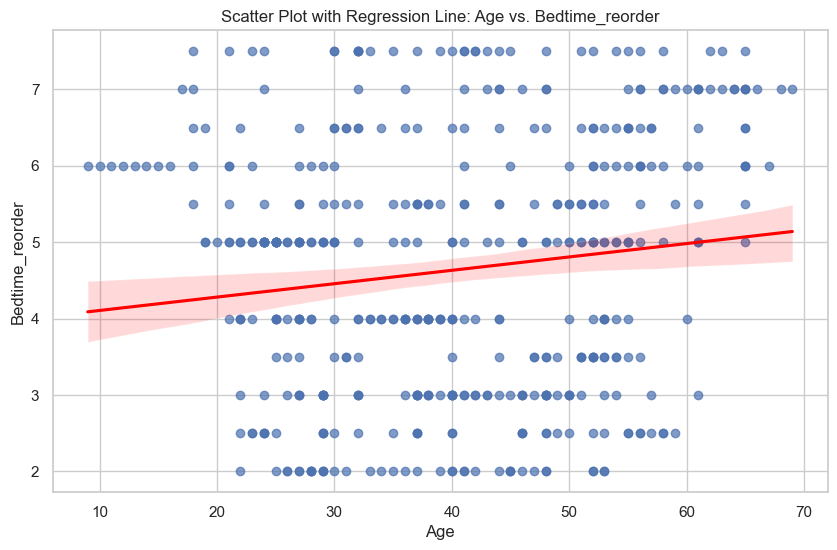

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(data=df_sleep, x='Age', y='Bedtime_reorder', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: Age vs. Bedtime_reorder')
plt.xlabel('Age')
plt.ylabel('Bedtime_reorder')
plt.show()

• Insight:

The scatter plot with a regression line illustrates a positive correlation between age and bedtime. On average, showing that older individuals tend to have later bedtimes than their youngers.


**Relationship between Age and Sleep Duration**

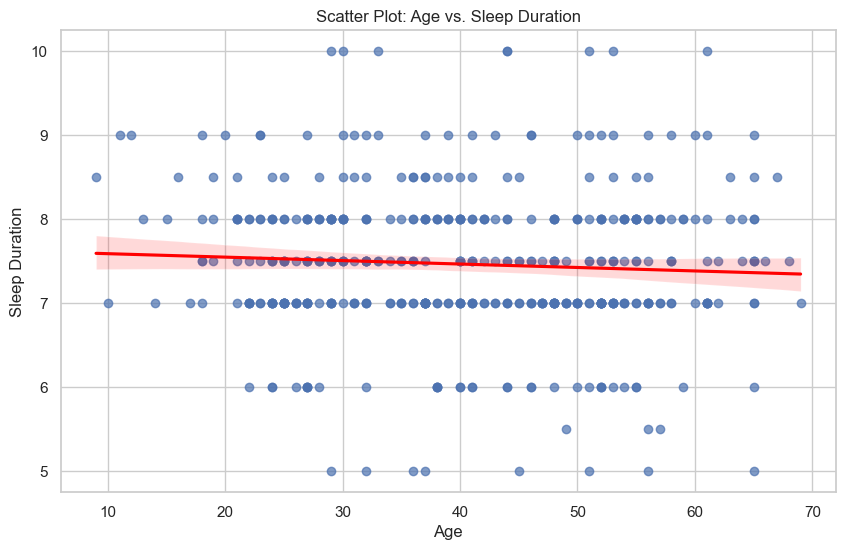

In [53]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(data=df_sleep, x='Age', y='Sleep duration', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Age vs. Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()


• Insight:

The scatter plot suggests a potential negative correlation between age and sleep duration, indicating that, on average, older individuals may have shorter sleep durations compared to their younger counterparts.


**Comparison of Sleep Stages by Age Bins**

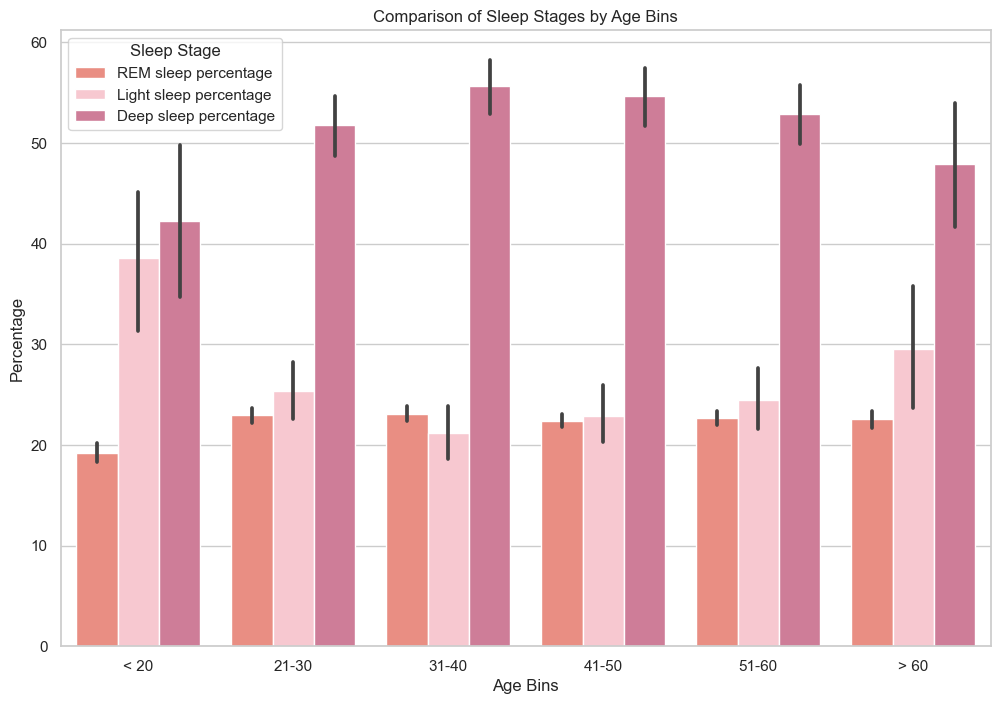

In [55]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['< 20', '21-30', '31-40', '41-50', '51-60', '> 60']

df_sleep['Age_bin'] = pd.cut(df_sleep['Age'], bins=age_bins, labels=age_labels, right=False)

df_melted = pd.melt(df_sleep, id_vars=['Age', 'Age_bin'],
                    value_vars=['REM sleep percentage', 'Light sleep percentage', 'Deep sleep percentage'])

custom_colors = {'REM sleep percentage': 'salmon', 'Light sleep percentage': 'pink', 'Deep sleep percentage': 'palevioletred'}

plt.figure(figsize=(12, 8))
sns.barplot(x='Age_bin', y='value', hue='variable', data=df_melted, palette=custom_colors)
plt.xlabel('Age Bins')
plt.ylabel('Percentage')
plt.title('Comparison of Sleep Stages by Age Bins')
plt.legend(title='Sleep Stage', loc='upper left')
plt.show()


• Insight:

The bar plot comparing sleep stages across age bins, categorized into six groups, reveals notable patterns. Individuals aged between 31 and 40 exhibit the highest deep sleep efficiency, while those under the age of 20 show a significantly greater percentage of light sleep. 


**Comparison of Sleep Stages by Smoking status**

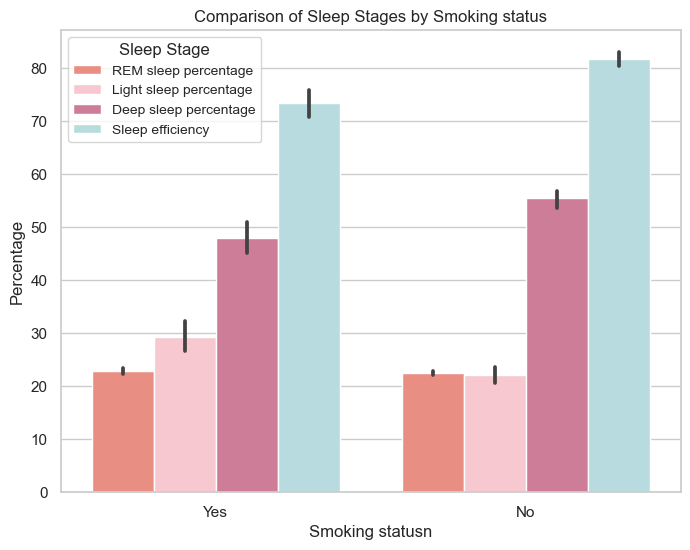

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = pd.melt(df_sleep, id_vars='Smoking status', 
value_vars=['REM sleep percentage', 'Light sleep percentage', 'Deep sleep percentage', 'Sleep efficiency'])

custom_colors = {'REM sleep percentage': 'salmon', 'Light sleep percentage': 'pink', 
                 'Deep sleep percentage': 'palevioletred', 'Sleep efficiency':'powderblue'}
df_melted['Smoking status'] = df_melted['Smoking status'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(8, 6))
sns.barplot(x='Smoking status', y='value', hue='variable', data=df_melted, palette=custom_colors)
plt.xlabel('Smoking statusn')
plt.ylabel('Percentage')
plt.title('Comparison of Sleep Stages by Smoking status')
plt.legend(title='Sleep Stage', loc='upper left',fontsize='small')
plt.show()


• Insight:  

The bar plot visually compares different sleep stages across individuals categorized by their smoking status, Observations regarding variations in sleep stages between non-smokers and smokers can be made, providing insights into potential correlations between smoking status and sleep patterns.

Individuals who do not smoke exhibit higher sleep efficiency, a greater proportion of deep sleep, and a lower percentage of light sleep compared to smokers, suggesting a potential association between smoking status and overall sleep quality.


**Effect of Drinking Alcohol on Sleep efficiency**

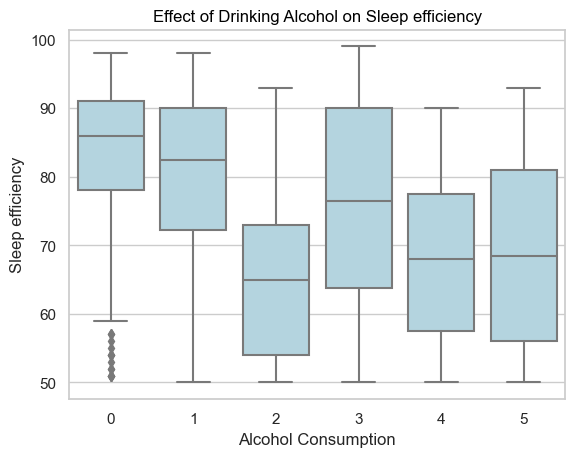

In [57]:
sns.boxplot(data=df_sleep, x="Alcohol consumption", y="Sleep efficiency", color="lightblue")
plt.title("Effect of Drinking Alcohol on Sleep efficiency", color="black", fontsize=12)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Sleep efficiency")
plt.show()

• Insight:  

The box plot illustrates the relationship between alcohol consumption and sleep efficiency.
Individuals with lower alcohol consumption levels exhibit higher sleep efficiency than those with higher alcohol consumption.


**Comparison of Sleep Stages by Alcohol Consumption**

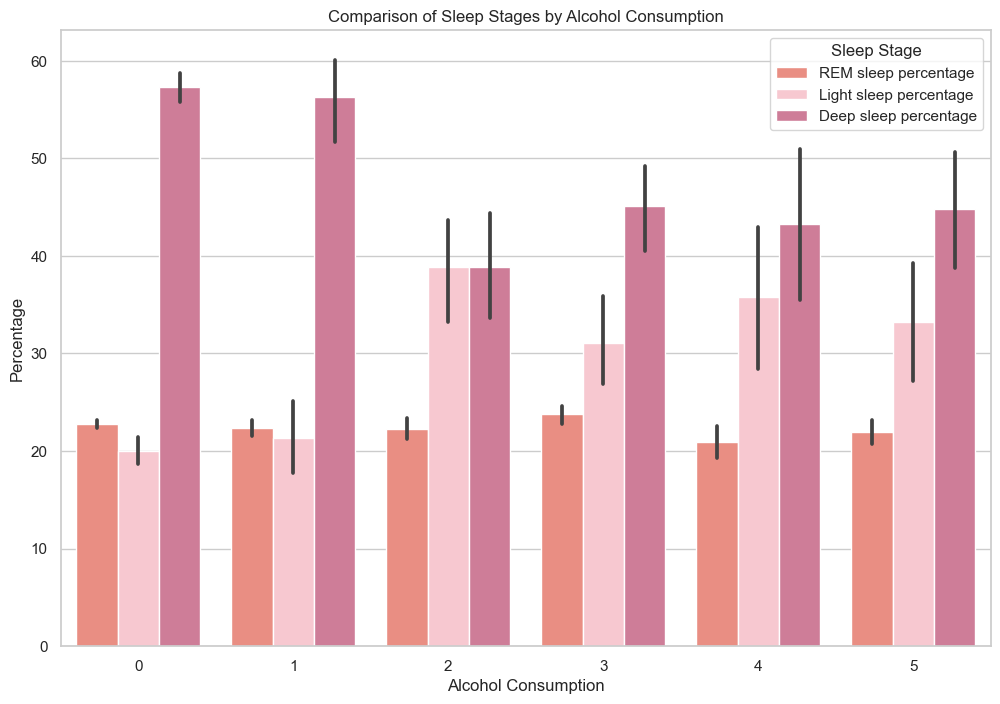

In [58]:
df_melted = pd.melt(df_sleep, id_vars='Alcohol consumption', 
                    value_vars=['REM sleep percentage', 'Light sleep percentage', 'Deep sleep percentage'])

custom_colors = {'REM sleep percentage': 'salmon', 'Light sleep percentage': 'pink', 
                 'Deep sleep percentage': 'palevioletred'}

plt.figure(figsize=(12, 8))
sns.barplot(x='Alcohol consumption', y='value', hue='variable', data=df_melted, palette=custom_colors)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Percentage')
plt.title('Comparison of Sleep Stages by Alcohol Consumption')
plt.legend(title='Sleep Stage', loc='upper right')
plt.show()

• Insight:

The bar plot comparing sleep stages across different levels of alcohol consumption indicates that individuals with higher alcohol consumption tend to exhibit lower deep sleep percentages and higher light sleep percentages compared to those with lower alcohol consumption. This suggests a potential association between alcohol intake and alterations in sleep architecture, with increased alcohol consumption potentially contributing to a reduction in deep sleep and an increase in light sleep.


**Effect of Drinking Alcohol on Awakenings**

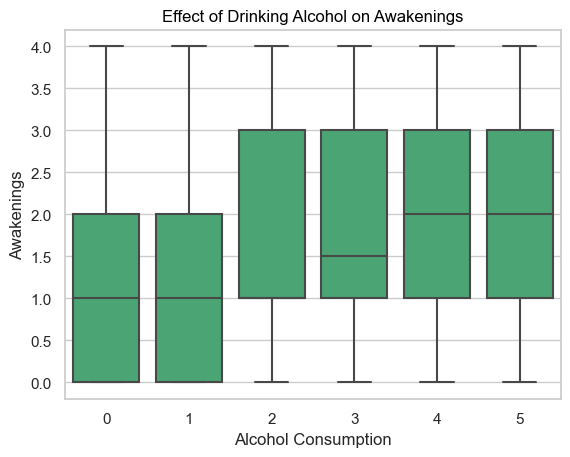

In [59]:
sns.boxplot(data=df_sleep, x="Alcohol consumption", y="Awakenings", color="mediumseagreen")
plt.title("Effect of Drinking Alcohol on Awakenings", color="black", fontsize=12)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Awakenings")
plt.show()

• Insight:

The box plot indicates that individuals who consumed more than 2 units of alcohol in the 24 hours prior to bedtime tend to experience more awakenings compared to those with less than 2 units of alcohol consumption. This observation suggests a potential association between higher alcohol intake, particularly close to bedtime, and an increased likelihood of sleep disruptions.


**Sleep Efficiency by Exercise Frequency**

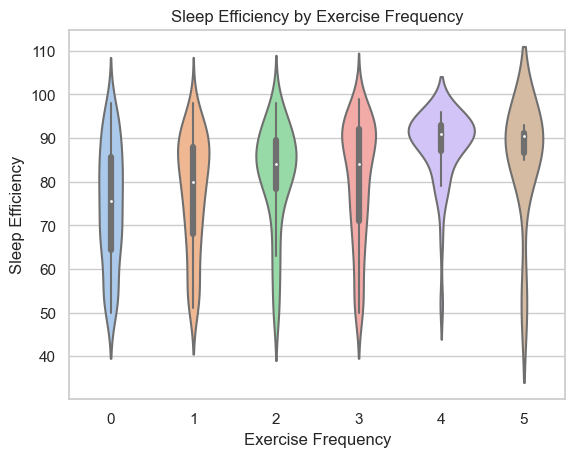

In [60]:
sns.violinplot(x='Exercise frequency', y='Sleep efficiency', data=df_sleep, palette='pastel')
plt.xlabel('Exercise Frequency')
plt.ylabel('Sleep Efficiency')
plt.title('Sleep Efficiency by Exercise Frequency')
plt.show()

• Insight:

The violin plot illustrates that individuals who engage in more frequent exercise each week tend to exhibit a majority of higher sleep efficiency scores. This suggests a potential positive association between increased exercise frequency and enhanced sleep efficiency, indicating that regular physical activity may contribute to improved sleep quality.


**Relationship between Bedtime and Exercise Frequency**

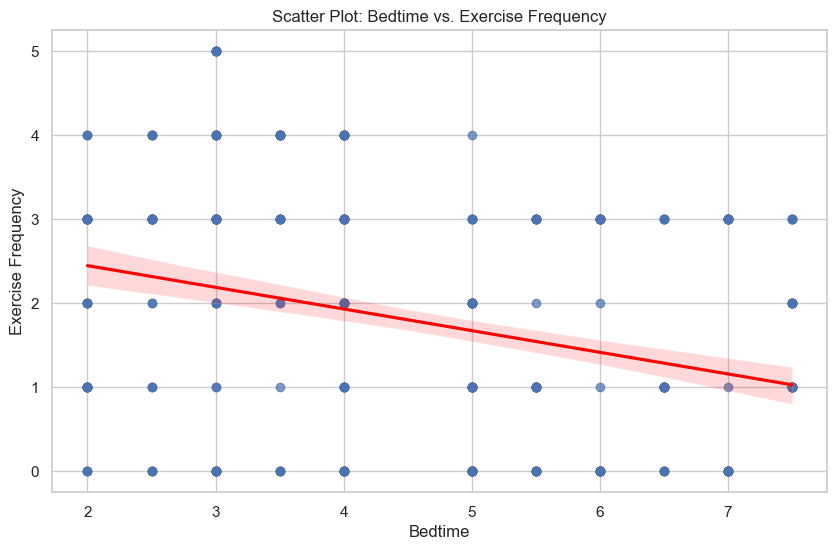

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(data=df_sleep, x='Bedtime_reorder', y='Exercise frequency', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Bedtime vs. Exercise Frequency')
plt.xlabel('Bedtime')
plt.ylabel('Exercise Frequency')
plt.show()

• Insight:

After reordering bedtime, a comparison with exercise frequency per week reveals a positive correlation. Individuals who exercise more frequently tend to have an earlier bedtime, indicating a potential association between increased physical activity and an earlier onset of sleep.


**Comparison of Sleep Stages by Caffeine consumption**

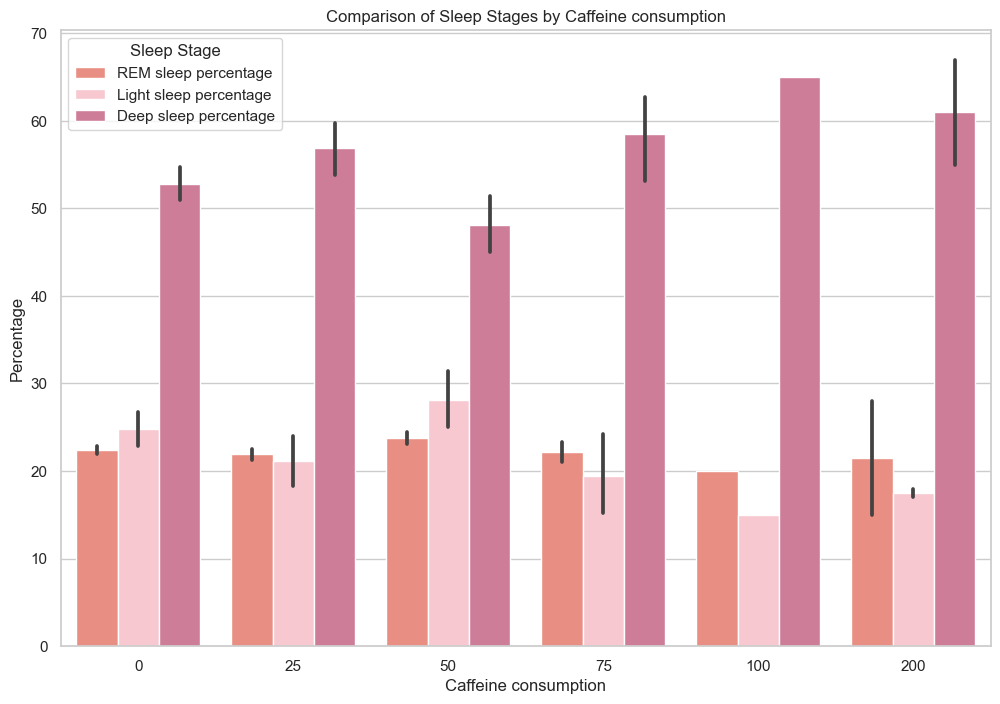

In [62]:
df_melted = pd.melt(df_sleep, id_vars='Caffeine consumption', 
                    value_vars=['REM sleep percentage', 'Light sleep percentage', 'Deep sleep percentage'])

custom_colors = {'REM sleep percentage': 'salmon', 'Light sleep percentage': 'pink', 
                 'Deep sleep percentage': 'palevioletred'}

plt.figure(figsize=(12, 8))
sns.barplot(x='Caffeine consumption', y='value', hue='variable', data=df_melted, palette=custom_colors)
plt.xlabel('Caffeine consumption')
plt.ylabel('Percentage')
plt.title('Comparison of Sleep Stages by Caffeine consumption')
plt.legend(title='Sleep Stage', loc='upper left')
plt.show()

• Insight:

The bar plot comparing sleep stages by caffeine consumption in the 24 hours prior to bedtime indicates a trend. Higher caffeine consumption appears to be associated with a higher percentage of deep sleep and a lower percentage of light sleep. This observation suggests a potential influence of caffeine intake on sleep architecture, with increased consumption possibly contributing to a more favorable distribution of sleep stages, characterized by higher deep sleep and lower light sleep percentages.


# Linear regression

In [66]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [68]:
df = pd.read_csv('Cleaned_Sleep_Efficiency.csv')

In [69]:
#Specify independent variable (X) and dependent variable (y)
X = df[['Age', 'Caffeine consumption', 'Exercise frequency']]
y = df['Sleep efficiency']

In [70]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#  Create a linear regression model
model = LinearRegression()

In [72]:
# Train the model with the training set
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Make predictions using the test set
y_pred = model.predict(X_test)

In [74]:
# Evaluate the model's performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.80674869452401
Mean Squared Error: 168.12769212969908
Root Mean Squared Error: 12.966406292018583


In [75]:
#Print coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [0.08137666 0.03918731 2.39082999]
Intercept: 70.49211963965362


In [76]:
# Evaluate overall model fit
print('R-squared:', model.score(X_test, y_test))

R-squared: 0.09939245255826124


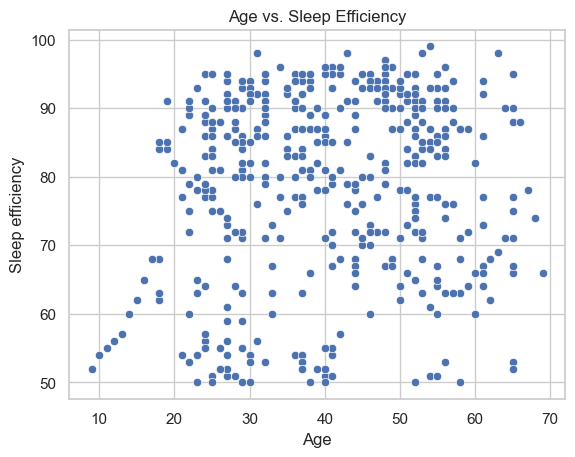

In [77]:
#  Create scatter plots
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Age vs. Sleep efficiency
sns.scatterplot(x='Age', y='Sleep efficiency', data=df)
plt.title('Age vs. Sleep Efficiency')
plt.show()

/Users/a1000yun/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


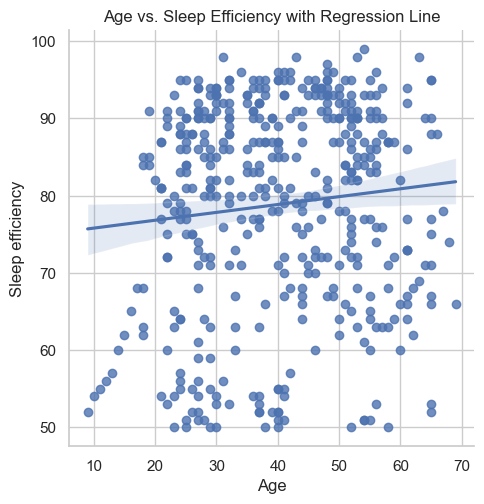

In [78]:
# Plot regression line on scatter plot
sns.lmplot(x='Age', y='Sleep efficiency', data=df)
plt.title('Age vs. Sleep Efficiency with Regression Line')
plt.show()

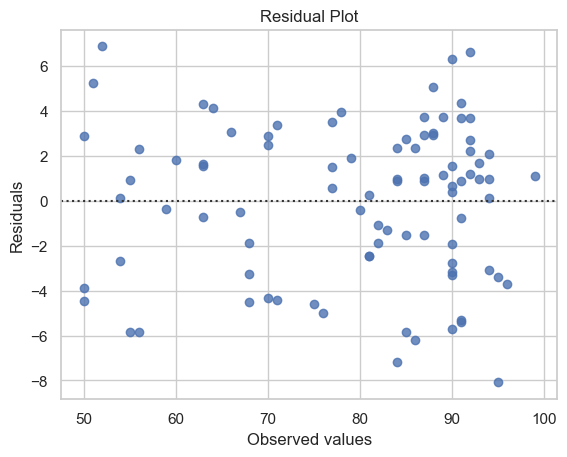

In [79]:
# Create a residual plot
sns.residplot(x=y_test, y=y_pred)
plt.title('Residual Plot')
plt.xlabel('Observed values')
plt.ylabel('Residuals')
plt.show()

Done By: Chien-Yun Hsu, Milini  Pippera, Sangam Guleria  
Data Analytics group project in Conestoga College


